In [19]:
import numpy as np
import pandas as pd
import os
import math
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings
import math

# Seaborn default configuration
sns.set_style("darkgrid")

# set the custom size for my graphs

In [20]:
#Data Reading
def read_data(data_set_folder):
    dir_lst = []
    cur_dir = os.getcwd()
    data_dir = os.path.join(cur_dir, data_set_folder)
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            dir_lst.append(os.path.join(root, file))
    test_data_dir = dir_lst[1]
    test_labels_dir = dir_lst[2]

    train_data_dir_lst = dir_lst[3:13]
    train_labels_dir_lst = dir_lst[13:]

    return test_data_dir, test_labels_dir, train_data_dir_lst, train_labels_dir_lst


data_folder = 'regression-dataset'
tst_dt_dir, tst_lbl_dir, trn_dt_dirs, trn_lbl_dirs = read_data(data_folder)


In [73]:
def getDataFrame(dir):
    data = pd.read_csv(dir, names=['x', 'y'])
    return data

def getDataFrameTarget(dir):
    data = pd.read_csv(dir, names=['target'])
    return data

In [61]:
values = getDataFrame(trn_dt_dirs[0])
#read training data
X = pd.read_csv(trn_dt_dirs[0], names=['x', 'y'])
#read training Labels
Y = pd.read_csv(trn_lbl_dirs[0], names=['t'])

print(X.head())
print(Y.head())

          x         y
0 -0.243905  0.006330
1 -0.308713 -0.043968
2  0.009464 -0.323869
3  0.235865  0.188364
4 -0.363839  0.192133
          t
0 -0.637080
1 -1.370977
2 -0.145243
3  0.458230
4  1.190616


In [62]:
values

,x,y
0,-0.243905,0.006330
1,-0.308713,-0.043968
2,0.009464,-0.323869
3,0.235865,0.188364
4,-0.363839,0.192133
5,0.319389,0.216261
6,0.396865,0.499338
7,0.358656,0.398685
8,0.395872,0.257762
9,0.000003,-0.331498


In [22]:
def add_labels(training_data, labels):
    training_data['target'] = labels
    return training_data

In [5]:
#tr_data['target'] = tr_labels
# tr_data = add_labels(tr_data, tr_labels)
# tr_data.head()

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [24]:
X.describe()

,x,y
count,20.000000,20.000000
mean,0.091646,0.009039
std,0.264596,0.307399
min,-0.363839,-0.483927
25%,-0.053443,-0.306139
50%,0.087434,0.035752
75%,0.329206,0.226636
max,0.407011,0.499338


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

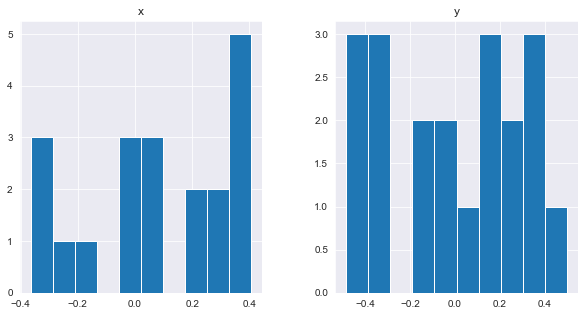

In [25]:
X.hist(figsize=(10,5))

Text(0.5, 0, 'X')

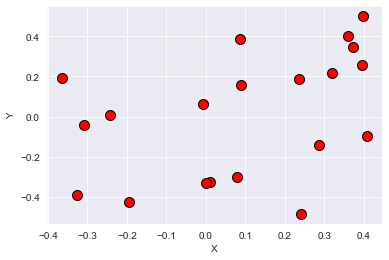

In [26]:
plt.plot(X.x, X.y, 'ro', ms=10, mec='k')
plt.ylabel('Y')
plt.xlabel('X')

In [12]:
#X = (X - X.mean())/X.std()
#X = X.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)), axis=1)

In [20]:
#data_norm = data_norm.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)), axis=1)
#data_norm = data_norm.apply(lambda x: (x-np.mean(x))/(np.std(x)), axis=1)

In [27]:
X.corr()

,x,y
x,1.000000,0.418255
y,0.418255,1.000000


In [28]:
X['x'].shape[0]

20

In [29]:
dummy_col = np.ones(X['x'].shape[0])
X_cop = X.copy()
X_cop.insert(loc=0, column='dummy', value=dummy_col)

In [42]:
def add_dummy(data):
    copied_data = data.copy()
    dummy_col = np.ones(copied_data['x'].shape[0])
    copied_data.insert(loc=0, column='dummy', value=dummy_col)
    return copied_data

In [31]:
Y_cop = Y.copy()

In [22]:
# def norm_data(data):
#     data_norm = data.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)), axis=1)
#     return data_norm

In [32]:
# #add dummy row
# def add_dummy(data):
#     copied_data_norm = data.copy()
#     data_to_append = {}
#     for i in range(len(copied_data_norm.columns)):
#         data_to_append[copied_data_norm.columns[i]] = 1
#     frame = pd.concat([pd.DataFrame([data_to_append]), copied_data_norm], ignore_index=True)
#     return frame
# X_cop = add_dummy(X)
# X_cop.head()

In [33]:
Y_cop.head()


,t
0,-0.637080
1,-1.370977
2,-0.145243
3,0.458230
4,1.190616


In [17]:
# def conv_df_to_np(data):
#     Y  = data.target.to_numpy().reshape(21,1)
#     data_copy = data.drop(columns=['target'], inplace=False)
#     X = data_copy.to_numpy()
#     m = X.shape[0]
#     n = X.shape[1]
#     return X, Y, m, n

# X, Y, no_exambles, no_features = conv_df_to_np(X_cop)

In [34]:
def create_theta(no_features):
    np.random.seed(123) #Set the seed
    return np.random.rand(no_features)[:, None]


In [35]:
#computing cost function
#We will use L2 norm function as a cost function, why? Lecture 4 in CS480
def MSE(yHat, y):
    return np.sum((yHat - y)**2) / y.size
    

In [36]:
def compute_cost(X, Y, theta):
    y_hat = X.dot(theta)
    cost = MSE(y_hat.values, Y.values)
    return cost

In [37]:
no_features = X_cop.shape[1]
theta = create_theta(no_features)
# y_hat = X_cop.dot(theta)
# error = y_hat.values - Y_cop.values
# MSE_cost = np.sum(error.T.dot(error)) / Y_cop.size
# MSE_cost
cost = compute_cost(X_cop, Y_cop, theta)
print(f'Initial Cost equals {cost}')


Initial Cost equals 1.8035252189137236


In [98]:
# Compute Gradient Descent
def gradient_descent(X, Y, theta, alpha):
    #list_of_cost = []
    m = X.shape[0]
    theta_copy = theta.copy()
    #for i in range(no_iteration):
    h = X.dot(theta_copy).values - Y.values
    delata = (1/m) * np.sum(h.T.dot(X))
    theta_copy = theta_copy - (alpha *  delata)
    cost = compute_cost(X, Y, theta_copy)
    #list_of_cost.append(compute_cost(X, Y, theta_copy))
    return theta_copy, cost


In [99]:
theta , cost = gradient_descent(X_cop, Y_cop, theta, 0.01)

In [100]:
theta

array([[ 0.44038041],
       [ 0.03005056],
       [-0.02923732]])

In [127]:
costs = []
theta = create_theta(X.shape[1])
print(theta)
for i in range(150):
    for nof_batch in range(len(trn_dt_dirs)-5):
        X = add_dummy(getDataFrame(trn_dt_dirs[nof_batch]))
        Y = getDataFrameTarget(trn_lbl_dirs[nof_batch])
        theta, cost = gradient_descent(X, Y, theta, 0.01)
    costs.append(cost)



[[0.69646919]
 [0.28613933]
 [0.22685145]]


In [128]:
theta

array([[ 0.3714318 ],
       [-0.03889805],
       [-0.09818593]])

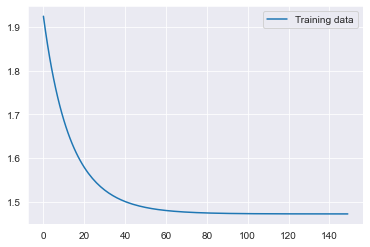

In [129]:
plt.plot([i for i in range(len(costs))], costs)
plt.legend(['Training data', 'Linear regression'])

In [130]:
x_vals = X.values[:,1]
x_vals

array([-0.278684, -0.397209,  0.456488, -0.044885, -0.254823,  0.478451,
       -0.376205, -0.27124 ,  0.2105  ,  0.042931, -0.106466,  0.129318,
        0.139633,  0.411761, -0.324942,  0.071727,  0.330965,  0.207352,
        0.446579, -0.04079 ])

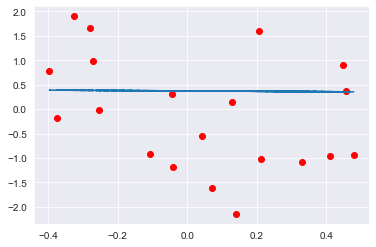

In [134]:
x1_vals = X.values[:,1]
slope1 = theta[1]
intercept = theta[0]
y_vals = intercept + slope1 * x1_vals
plt.plot(x1_vals, Y, 'ro')
plt.plot(x1_vals, y_vals, '--')

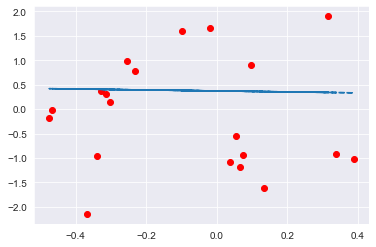

In [135]:
x2_vals = X.values[:,2]
slope2 = theta[2]
intercept = theta[0]
y_vals = intercept + slope2 * x2_vals
plt.plot(x2_vals, Y, 'ro')
plt.plot(x2_vals, y_vals, '--')